In [2]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os 
from bs4 import BeautifulSoup
from tensorflow.keras.applications.vgg19 import preprocess_input 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Conv2D
import cv2

In [3]:
labels_path = './annotations/'
images_path = './images/'

In [4]:
images = sorted(os.listdir(images_path))
labels = sorted(os.listdir(labels_path))

In [5]:
len(images)

852

In [6]:
len(labels)

852

In [7]:
labels[500]

'maksssksksss55.xml'

In [8]:
images[500]

'maksssksksss55.png'

## Data extraction 

In [9]:
def generate_images_and_labels(xml_location):
    
    with open(xml_location) as xml_file:
        soup = BeautifulSoup(xml_file.read(),'xml')
        objects = soup.find_all('object')
        no_of_persons = len(objects)
        
        
    # labelling people wearing a mask with 0, not wearing a mask with one and mask worn incorrectly as 2
    labels = []
    boxes = []
    for obj in objects:
        if obj.find('name').text == 'without_mask':
            labels.append(1)
        if obj.find('name').text == 'with_mask':
            labels.append(0)
        if obj.find('name').text == 'mask_weared_incorrect':
            labels.append(2)
           
    # Extracting the position of the image
        x_min = int(obj.find('xmin').text)
        y_min = int(obj.find('ymin').text)
        x_max = int(obj.find('xmax').text)
        y_max = int(obj.find('ymax').text)
        
        boxes.append([x_min,y_min,x_max,y_max])
        
    boxes = np.array(boxes)
    labels = np.array(labels)
    
    # getting the output in form of dictioanry
    result = {}
    result['labels'] = labels
    result['boxes'] = boxes
    
    return result,no_of_persons

In [10]:
final_result = []
total_no_of_persons = []
for file in labels:
    result,no_of_persons = generate_images_and_labels(labels_path + file)
    print(result)
    print(no_of_persons)
    final_result.append(result)
    total_no_of_persons.append(no_of_persons)
    

{'labels': array([1, 0, 1]), 'boxes': array([[ 79, 105, 109, 142],
       [185, 100, 226, 144],
       [325,  90, 360, 141]])}
3
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 1]), 'boxes': array([[321,  34, 354,  69],
       [224,  38, 261,  73],
       [299,  58, 315,  81],
       [143,  74, 174, 115],
       [ 74,  69,  95,  99],
       [191,  67, 221,  93],
       [ 21,  73,  44,  93],
       [369,  70, 398,  99],
       [ 83,  56, 111,  89]])}
9
{'labels': array([0]), 'boxes': array([[ 98, 267, 194, 383]])}
1
{'labels': array([0, 0, 0]), 'boxes': array([[189,  30, 245,  88],
       [387,  54, 400,  75],
       [118,  87, 163, 126]])}
3
{'labels': array([0]), 'boxes': array([[ 48, 294, 164, 400]])}
1
{'labels': array([0]), 'boxes': array([[212,  57, 251, 106]])}
1
{'labels': array([0, 0, 0, 0]), 'boxes': array([[ 42,  54,  94, 110],
       [188,  46, 236, 106],
       [261,  88, 303, 130],
       [368, 112, 400, 151]])}
4
{'labels': array([1, 1, 1, 0, 0, 1, 1, 1]), 'boxes': array([[ 42,

{'labels': array([0, 0]), 'boxes': array([[129,  96, 175, 155],
       [220, 123, 260, 169]])}
2
{'labels': array([0]), 'boxes': array([[144, 110, 244, 235]])}
1
{'labels': array([0]), 'boxes': array([[102, 200, 194, 333]])}
1
{'labels': array([0, 0, 0]), 'boxes': array([[130,  19, 155,  47],
       [212,  56, 232,  79],
       [298,  60, 316,  80]])}
3
{'labels': array([2, 2, 1]), 'boxes': array([[ 91,  89, 114, 111],
       [183, 102, 203, 122],
       [310,  96, 333, 119]])}
3
{'labels': array([0, 0]), 'boxes': array([[119, 122, 184, 192],
       [265,  90, 324, 153]])}
2
{'labels': array([1, 0, 0, 0]), 'boxes': array([[103,   9, 120,  33],
       [198,  15, 218,  36],
       [224,  89, 243, 109],
       [272,  33, 294,  55]])}
4
{'labels': array([0, 1, 1, 0, 1, 0]), 'boxes': array([[  1,  20,  81, 136],
       [ 68,  95, 124, 157],
       [116, 104, 140, 144],
       [151,  89, 247, 205],
       [325,  77, 397, 156],
       [243, 120, 283, 179]])}
6
{'labels': array([0, 0, 0, 0, 0,

{'labels': array([0, 0, 0, 0, 1]), 'boxes': array([[  8,  64,  43,  93],
       [225,  44, 261,  93],
       [208,  52, 225,  77],
       [328,  48, 348,  66],
       [138,  55, 169,  82]])}
5
{'labels': array([1]), 'boxes': array([[115, 202, 218, 341]])}
1
{'labels': array([1]), 'boxes': array([[139, 223, 251, 371]])}
1
{'labels': array([0, 0]), 'boxes': array([[120, 122, 184, 194],
       [266,  92, 323, 151]])}
2
{'labels': array([0]), 'boxes': array([[183, 101, 270, 185]])}
1
{'labels': array([0]), 'boxes': array([[113,  58, 162, 104]])}
1
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 'boxes': array([[ 21, 211,  53, 242],
       [129, 187, 161, 219],
       [208, 189, 234, 223],
       [350, 217, 395, 251],
       [377, 151, 389, 162],
       [255, 156, 260, 165],
       [229, 153, 234, 159],
       [155, 156, 161, 163],
       [112, 158, 119, 166],
       [299, 182, 304, 190]])}
10
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 'boxes': array([[ 24,  50

{'labels': array([0]), 'boxes': array([[109,  65, 213, 161]])}
1
{'labels': array([0, 0, 0, 0, 0, 2, 1, 1, 1, 1]), 'boxes': array([[118,  41, 161,  91],
       [191,  76, 208,  96],
       [174, 125, 203, 156],
       [209, 124, 237, 151],
       [194, 181, 233, 216],
       [287, 144, 327, 179],
       [226,  86, 238,  98],
       [155,  83, 172, 103],
       [ 32,  57,  49,  89],
       [385,  77, 400,  93]])}
10
{'labels': array([1, 0, 0, 0, 0, 1, 0]), 'boxes': array([[ 17,  42,  55,  85],
       [ 62,  91, 111, 140],
       [167,  55, 238, 133],
       [318,  50, 376, 113],
       [295,  71, 314,  96],
       [374,  39, 394,  70],
       [130,  63, 152,  85]])}
7
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]), 'boxes': array([[  1,  77,   8,  83],
       [ 43,  82,  51,  89],
       [  7,  95,  22, 110],
       [ 33, 115,  45, 130],
       [ 73,  89,  94, 111],
       [ 88,  78,  97,  90],
       [100,  73, 108,  82],
       [128,  78, 133,  84],
      

{'labels': array([0, 0]), 'boxes': array([[ 35, 106, 162, 245],
       [248, 135, 361, 254]])}
2
{'labels': array([0, 0, 0]), 'boxes': array([[ 28, 201,  52, 216],
       [143,  93, 175, 126],
       [198,  97, 229, 125]])}
3
{'labels': array([1, 1]), 'boxes': array([[ 89, 193, 149, 258],
       [249, 300, 267, 349]])}
2
{'labels': array([0, 2, 2]), 'boxes': array([[ 50,  96, 120, 171],
       [223,  81, 285, 159],
       [279,  44, 340, 114]])}
3
{'labels': array([0, 0, 0, 0, 0, 0, 0]), 'boxes': array([[314,  63, 338,  92],
       [184,  42, 213,  72],
       [275,  65, 296,  91],
       [256,  82, 277,  95],
       [ 89,  87, 118, 116],
       [133,  89, 154, 113],
       [365,  98, 370, 103]])}
7
{'labels': array([0]), 'boxes': array([[136, 259, 200, 359]])}
1
{'labels': array([0, 0]), 'boxes': array([[189,  88, 220, 125],
       [144,  65, 178, 109]])}
2
{'labels': array([0, 0, 0, 0]), 'boxes': array([[  5, 102,  51, 163],
       [143, 129, 199, 183],
       [267,  66, 318, 117],
 

{'labels': array([0]), 'boxes': array([[ 82, 139, 187, 270]])}
1
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 'boxes': array([[ 44,  25,  95,  81],
       [ 50, 121,  89, 158],
       [ 41, 210,  88, 260],
       [176,  29, 228,  85],
       [175, 123, 225, 169],
       [177, 212, 227, 259],
       [312,  28, 360,  81],
       [302, 118, 346, 169],
       [288, 182, 368, 264]])}
9
{'labels': array([0]), 'boxes': array([[114,  47, 143,  75]])}
1
{'labels': array([0, 0, 0, 0]), 'boxes': array([[ 24,  79,  56, 107],
       [ 92,  44, 125,  79],
       [166,  65, 203, 100],
       [284,  39, 343,  98]])}
4
{'labels': array([0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]), 'boxes': array([[ 25,  69,  48,  93],
       [ 88,  87, 107, 106],
       [128,  61, 149,  84],
       [127, 157, 168, 209],
       [147, 110, 181, 145],
       [208,  61, 220,  77],
       [229,  96, 265, 137],
       [263,  46, 277,  65],
       [270,  72, 288,  92],
       [298, 108, 321, 133],
       [308,  65, 328,  

{'labels': array([0, 2, 0, 1]), 'boxes': array([[209,  73, 247, 113],
       [287,  60, 328, 115],
       [354, 109, 400, 191],
       [156,  20, 173,  37]])}
4
{'labels': array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0]), 'boxes': array([[ 26,  92,  44, 121],
       [106,  88, 122, 111],
       [122, 102, 146, 124],
       [151,  73, 168,  94],
       [168,  76, 190, 100],
       [188,  96, 219, 131],
       [192,  59, 210,  78],
       [223,  53, 243,  76],
       [272,  67, 291,  88],
       [260,  93, 279, 115],
       [288,  86, 308, 113],
       [348,  71, 366,  91],
       [303,  96, 330, 123],
       [371,  77, 396, 100],
       [ 68,  75,  80,  88],
       [321,  70, 333,  84],
       [367,  67, 378,  79]])}
17
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]), 'boxes': array([[123, 148, 188, 217],
       [  1, 231,  57, 295],
       [ 15,  67,  62, 116],
       [114,  74, 159, 116],
       [236,  80, 293, 135],
       [191,  30, 233,  78],
       [279,  10, 317,

{'labels': array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'boxes': array([[ 20,  71,  76, 129],
       [150, 114, 197, 171],
       [201, 149, 230, 192],
       [241, 153, 291, 205],
       [309, 140, 345, 185],
       [250,  67, 275,  99],
       [276,  60, 302,  87],
       [196,  48, 214,  72],
       [214,  35, 234,  57],
       [178,  65, 204,  87],
       [232,  11, 248,  26],
       [266,   6, 281,  19],
       [207,   8, 222,  22]])}
13
{'labels': array([0]), 'boxes': array([[181,  75, 247, 148]])}
1
{'labels': array([0]), 'boxes': array([[132, 191, 222, 323]])}
1
{'labels': array([0]), 'boxes': array([[138, 155, 325, 339]])}
1
{'labels': array([0, 0, 0, 0, 0]), 'boxes': array([[ 94,  48, 115,  71],
       [ 85, 164, 106, 182],
       [164,  51, 193,  86],
       [229,  25, 267,  72],
       [263,  57, 291,  87]])}
5
{'labels': array([0, 0]), 'boxes': array([[ 79, 174, 126, 226],
       [206, 120, 259, 178]])}
2
{'labels': array([0, 0, 0, 0, 0]), 'boxes': array([[ 82,  43, 113

{'labels': array([0, 0]), 'boxes': array([[ 36, 102, 157, 243],
       [246, 134, 362, 250]])}
2
{'labels': array([0]), 'boxes': array([[116, 156, 225, 302]])}
1
{'labels': array([1]), 'boxes': array([[ 85, 152, 190, 279]])}
1
{'labels': array([0]), 'boxes': array([[133, 189, 243, 341]])}
1
{'labels': array([0, 0, 0, 0, 0]), 'boxes': array([[ 13,  87,  35, 108],
       [ 39,  92,  65, 118],
       [ 98,  98, 117, 117],
       [208,  67, 235,  97],
       [160,  88, 172, 102]])}
5
{'labels': array([1]), 'boxes': array([[ 40, 246, 135, 364]])}
1
{'labels': array([0, 0, 0, 1]), 'boxes': array([[115,  47, 157,  87],
       [186,  90, 231, 130],
       [307,  42, 347,  84],
       [ 69,  64,  89,  81]])}
4
{'labels': array([2]), 'boxes': array([[ 82,  52, 141, 115]])}
1
{'labels': array([0]), 'boxes': array([[142, 280, 225, 387]])}
1
{'labels': array([0, 1, 1, 0, 0, 0, 1, 0]), 'boxes': array([[ 94,  89,  98,  92],
       [ 18,  92,  26,  98],
       [116,  87, 124,  94],
       [142,  70, 1

{'labels': array([1]), 'boxes': array([[ 95, 177, 195, 295]])}
1
{'labels': array([1, 0, 0]), 'boxes': array([[ 27,  81,  33,  86],
       [122,  80, 142, 104],
       [249,  57, 275,  86]])}
3
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 'boxes': array([[ 25,  13,  35,  25],
       [ 55,  10,  65,  20],
       [120,  16, 130,  31],
       [167,   3, 178,  15],
       [ 21,  48,  34,  62],
       [ 53,  40,  66,  52],
       [107,  37, 119,  51],
       [116,  56, 128,  68],
       [ 91,  77, 104,  89],
       [ 25,  72,  40,  86],
       [  8,  90,  22, 105],
       [ 36, 105,  50, 117],
       [ 36, 122,  48, 138],
       [ 60, 131,  73, 146],
       [ 61, 152,  79, 169],
       [ 42, 206,  60, 222],
       [ 52, 238,  70, 257],
       [ 93, 226, 111, 241],
       [124, 128, 140, 142],
       [134,  90, 146, 103],
       [143, 210, 161, 229],
       [170, 142, 185, 160],
       [1

{'labels': array([1, 0, 0]), 'boxes': array([[139, 213, 153, 231],
       [191, 117, 222, 154],
       [307, 123, 340, 161]])}
3
{'labels': array([0, 0, 1]), 'boxes': array([[150,  26, 193,  86],
       [204, 127, 245, 175],
       [274,  51, 286,  72]])}
3
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'boxes': array([[ 25,  75,  43,  95],
       [ 52,  68,  67,  84],
       [ 74,  61,  86,  74],
       [ 98,  78, 117,  97],
       [159,  75, 178,  94],
       [187,  49, 220,  84],
       [234,  53, 251,  76],
       [273,  81, 285,  93],
       [297,  65, 314,  85],
       [335,  81, 349,  97],
       [369,  73, 383,  90],
       [385,  72, 393,  85],
       [107,  59, 118,  69]])}
13
{'labels': array([0]), 'boxes': array([[100,  57, 148, 100]])}
1
{'labels': array([0]), 'boxes': array([[ 86, 194, 195, 340]])}
1
{'labels': array([0]), 'boxes': array([[160, 127, 321, 309]])}
1
{'labels': array([0, 0, 0]), 'boxes': array([[274,  54, 345, 133],
       [157,  67, 237, 164],
 

{'labels': array([1]), 'boxes': array([[ 95, 195, 193, 338]])}
1
{'labels': array([0]), 'boxes': array([[191,  96, 244, 148]])}
1
{'labels': array([0]), 'boxes': array([[ 69, 100, 214, 267]])}
1
{'labels': array([1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0]), 'boxes': array([[ 42,  27,  69,  52],
       [132,   5, 144,  20],
       [191,   9, 205,  25],
       [204,  14, 225,  39],
       [142,  34, 166,  55],
       [130,  63, 161,  96],
       [ 68,  75,  93,  91],
       [ 36, 167,  63, 194],
       [109,  91, 139, 125],
       [169,  77, 213, 121],
       [243,  41, 260,  59],
       [256,  44, 282,  72],
       [327,  41, 365,  80],
       [263, 132, 310, 182]])}
14
{'labels': array([0, 0]), 'boxes': array([[175,  89, 196, 120],
       [ 70,  93,  81, 104]])}
2
{'labels': array([0]), 'boxes': array([[130, 235, 234, 380]])}
1
{'labels': array([0]), 'boxes': array([[131,  86, 259, 216]])}
1
{'labels': array([0]), 'boxes': array([[ 92, 233, 151, 338]])}
1
{'labels': array([0, 0, 0, 0, 0

{'labels': array([0, 0, 2, 1, 1]), 'boxes': array([[ 32, 165,  67, 202],
       [171, 193, 204, 229],
       [279, 172, 313, 213],
       [102, 199, 118, 220],
       [240, 189, 258, 210]])}
5
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), 'boxes': array([[ 24,  60,  44,  83],
       [ 58,  75,  76,  95],
       [130,  67, 152,  92],
       [154,  65, 171,  83],
       [171, 116, 192, 138],
       [205,  62, 217,  80],
       [216,  63, 234,  84],
       [237,  72, 254,  90],
       [252,  79, 269,  99],
       [274,  82, 297, 106],
       [300,  60, 314,  77],
       [316,  61, 331,  76],
       [345,  54, 362,  74],
       [366,  58, 386,  80],
       [113,  55, 127,  72],
       [184,  66, 198,  81],
       [140,  56, 155,  71],
       [331,  62, 341,  74]])}
18
{'labels': array([0]), 'boxes': array([[104, 138, 218, 276]])}
1
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'boxes': array([[ 20, 124,  49, 158],
       [ 34, 219,  73, 267],
       [ 88,

{'labels': array([0]), 'boxes': array([[ 90, 213, 171, 321]])}
1
{'labels': array([0]), 'boxes': array([[244,  70, 348, 183]])}
1
{'labels': array([0, 0, 0, 0]), 'boxes': array([[ 78, 139, 108, 174],
       [180, 155, 206, 182],
       [305, 189, 326, 212],
       [375, 124, 400, 157]])}
4
{'labels': array([0, 1]), 'boxes': array([[ 81, 168, 127, 221],
       [  1, 169,  24, 228]])}
2
{'labels': array([1]), 'boxes': array([[101, 174, 209, 299]])}
1
{'labels': array([2, 1, 0, 0]), 'boxes': array([[  1,  95,  76, 172],
       [ 76, 128, 142, 185],
       [231,  85, 278, 159],
       [297,  91, 376, 169]])}
4
{'labels': array([0, 0, 0, 0, 0, 0, 2, 0, 0]), 'boxes': array([[ 61,  39,  96,  95],
       [ 90,  49, 136, 110],
       [157,  50, 193, 103],
       [205,  73, 233, 113],
       [251,  42, 274,  82],
       [285,  71, 311, 104],
       [312,  69, 328,  98],
       [322,  61, 335,  86],
       [342,  75, 357,  95]])}
9
{'labels': array([0, 0, 0, 1, 0, 0, 0, 0, 0]), 'boxes': array([[ 

{'labels': array([0, 0, 0, 0, 0]), 'boxes': array([[224,  53, 244,  73],
       [318,  48, 338,  72],
       [144,  48, 180,  85],
       [ 66,  68,  83,  85],
       [ 25,  57,  37,  73]])}
5
{'labels': array([0, 0, 1]), 'boxes': array([[ 91,  80, 140, 140],
       [154, 103, 206, 163],
       [273,  87, 339, 146]])}
3
{'labels': array([0, 2, 0, 0]), 'boxes': array([[107,  67, 136,  95],
       [157,  80, 165,  94],
       [286,  70, 300,  84],
       [319,  68, 356, 104]])}
4
{'labels': array([1, 2, 1, 2, 1, 1, 0]), 'boxes': array([[ 89,  26, 113,  56],
       [173,  34, 206,  65],
       [ 98,  96, 138, 127],
       [158,  92, 195, 138],
       [217, 103, 252, 141],
       [350, 105, 378, 139],
       [211, 160, 236, 201]])}
7
{'labels': array([2]), 'boxes': array([[136,  67, 187, 121]])}
1
{'labels': array([0]), 'boxes': array([[156, 167, 259, 304]])}
1
{'labels': array([0, 0]), 'boxes': array([[155,  72, 241, 155],
       [309,  36, 369, 104]])}
2
{'labels': array([0]), 'boxes': a

{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 'boxes': array([[ 38,   3,  90,  55],
       [173,   7, 225,  58],
       [307,   7, 351,  53],
       [285,  97, 335, 151],
       [175, 101, 225, 148],
       [ 46,  90,  93, 146],
       [ 49, 195,  93, 225],
       [178, 193, 218, 225],
       [305, 196, 362, 225]])}
9
{'labels': array([0, 0, 0, 0, 0, 0]), 'boxes': array([[ 29,  34,  62,  68],
       [ 95,  53, 126,  91],
       [151,  62, 177,  94],
       [188,  65, 221, 103],
       [288,  21, 322,  65],
       [249,  65, 272,  88]])}
6
{'labels': array([0, 0, 0, 0, 0, 0, 2, 0, 0]), 'boxes': array([[ 19,  47,  35,  61],
       [ 58,  42,  73,  57],
       [ 85,  63,  93,  71],
       [108,  56, 125,  69],
       [165,  28, 184,  49],
       [212,  34, 230,  58],
       [248,  59, 259,  70],
       [274,  37, 296,  62],
       [370,  22, 394,  44]])}
9
{'labels': array([0]), 'boxes': array([[109, 134, 206, 253]])}
1
{'labels': array([1, 0, 0]), 'boxes': array([[ 21,  78,  65, 119],
 

{'labels': array([2, 1]), 'boxes': array([[148,  75, 201, 133],
       [ 27,  78,  56, 106]])}
2
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0]), 'boxes': array([[ 47,  61,  81, 103],
       [102,  83, 133, 125],
       [181,  54, 208,  86],
       [214,  51, 252,  96],
       [199, 126, 239, 174],
       [245,  19, 273,  46],
       [311,  37, 339,  72],
       [272,  33, 292,  55]])}
8
{'labels': array([0, 0, 0, 0, 0]), 'boxes': array([[ 62,  11,  96,  52],
       [111,  48, 169, 115],
       [200,   1, 248,  43],
       [244,  65, 305, 141],
       [290, 101, 342, 185]])}
5
{'labels': array([0, 0, 0, 0, 0, 1, 0, 0]), 'boxes': array([[ 12, 141,  39, 174],
       [116, 115, 148, 151],
       [179,  79, 249, 149],
       [323,  95, 359, 143],
       [ 87, 123, 108, 147],
       [ 16, 115,  38, 139],
       [249, 122, 264, 141],
       [356, 117, 370, 143]])}
8
{'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0]), 'boxes': array([[ 82,  72, 104,  92],
       [150,  78, 165,  94],
       [171,  78, 

In [11]:
from IPython.display import Image

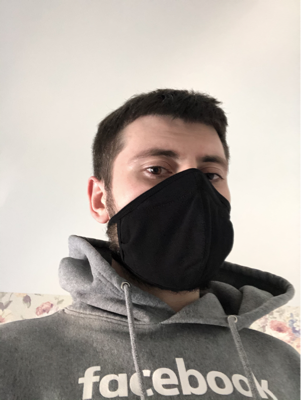

In [12]:
Image(filename=images_path+'maksssksksss55.png')

In [13]:
total_no_of_persons[500]

1

In [14]:
final_result[500]

{'labels': array([0]), 'boxes': array([[116, 141, 234, 291]])}

## Preprocessing the images

In [15]:
image_size = 224
face_images = []
face_labels = []

for i,image_path in enumerate(images):
    # reading the image
    image_read = cv2.imread(images_path+image_path)
    # looping every image to find the face location ie xmin,ymin,xmax,ymax and labels 0,1,2
    for j in range(0,total_no_of_persons[i]):
        #takes the location of individual image
        face_loc=final_result[i]['boxes'][j]
        # extracts the xmin,ymin,xmax,ymax coordinates
        temp_face = image_read[face_loc[1]:face_loc[3],face_loc[0]:face_loc[2]]
        # standardising the image size to 224
        temp_face = cv2.resize(temp_face,(image_size,image_size))
        # preprocessing the image as per vgg19 stds
        temp_face = preprocess_input(temp_face)
        # appending preprocessed image to face images
        face_images.append(temp_face)
        # extracting the label information and appending to face labels list
        face_labels.append(final_result[i]['labels'][j])
        
# converting the data into array        
face_images = np.array(face_images)  
face_labels = np.array(face_labels)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


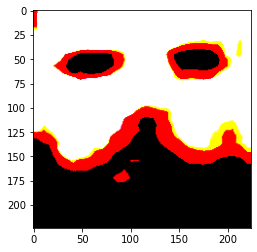

In [16]:
plt.imshow(face_images[0])

In [17]:
face_labels[22]

1

## Train test split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(face_images,face_labels,test_size=0.2,shuffle=True,random_state=10)

In [19]:
image_gen = ImageDataGenerator(zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1) # done to prevent overfitting

## Model Building

In [20]:
model = Sequential([
    #2 layers of 64 filters each of 3*3 kernel size and 1 maxpooling of 2*2
    Conv2D(64,(3,3), activation='ReLU',padding='same',input_shape = (224,224,3)),
    Conv2D(64,(3,3), activation='ReLU',padding='same'),
    MaxPooling2D(2,2),
    
    #2 layers of 128 filters each of 3*3 kernel size and 1 maxpooling of 2*2
    Conv2D(128,(3,3), activation='ReLU',padding='same'),
    Conv2D(128,(3,3), activation='ReLU',padding='same'),
    MaxPooling2D(2,2),
    
    #3 layers of 256 filters each of 3*3 kernel size and 1 maxpooling of 2*2
    Conv2D(256,(3,3), activation='ReLU',padding='same'),
    Conv2D(256,(3,3), activation='ReLU',padding='same'),
    Conv2D(256,(3,3), activation='ReLU',padding='same'),
    MaxPooling2D(2,2),
    
    #3 layers of 512 filters each of 3*3 kernel size and 1 maxpooling of 2*2
    Conv2D(512,(3,3), activation='ReLU',padding='same'),
    Conv2D(512,(3,3), activation='ReLU',padding='same'),
    Conv2D(512,(3,3), activation='ReLU',padding='same'),
    MaxPooling2D(2,2),   
    
    #3 layers of 512 filters each of 3*3 kernel size and 1 maxpooling of 2*2
    Conv2D(512,(3,3), activation='ReLU',padding='same'),
    Conv2D(512,(3,3), activation='ReLU',padding='same'),
    Conv2D(512,(3,3), activation='ReLU',padding='same'),
    MaxPooling2D(2,2),
    
    #Flattening the layers
    Flatten(),
    
    Dense(2048,activation='relu'),
    Dense(1024,activation='relu'),
    
    # output
    Dense(3,activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(image_gen.flow(x_train,y_train),batch_size=200,epochs=3,
                    validation_data=(x_test,y_test))

Epoch 1/3
102/102 [==============================] - 4003s 39s/step - loss: 30.8727 - accuracy: 0.7838 - val_loss: 0.3288 - val_accuracy: 0.8883
Epoch 2/3
102/102 [==============================] - 2838s 28s/step - loss: 0.3160 - accuracy: 0.8848 - val_loss: 0.2782 - val_accuracy: 0.9080
Epoch 3/3
102/102 [==============================] - 2688s 26s/step - loss: 0.3233 - accuracy: 0.8867 - val_loss: 0.3958 - val_accuracy: 0.8442


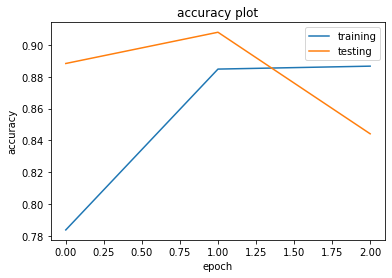

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend(['training','testing'])

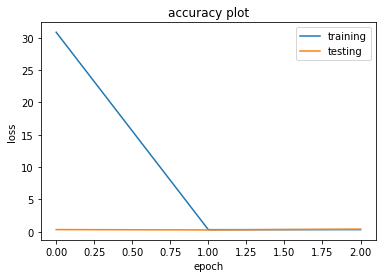

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('accuracy plot')
plt.legend(['training','testing'])